# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

## Dataset Collecting

### Preperations:

In [ ]:
! pip install beautifulsoup4
! pip install tmdbv3api

In [ ]:
# imports
import requests as reqs
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs


%matplotlib inline

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [ ]:
# I ASSUME #VOTES == URL SCORE

def get_titles_and_scores_safe(target_url='https://news.ycombinator.com/' ,encoding = 'utf-8'):
  target_html = reqs.get(target_url).content
  parsed_html_tree = bs(target_html, 'html.parser')
  # in some cases, no score is appears for a specific link, therefore we will fill that link score with None value.
  all_table_rows = parsed_html_tree.findAll('tr', attrs={'class':'athing'})
  all_titles_ids = [row.attrs['id'] for row in all_table_rows]
  all_titles = [title.text.strip() for title in parsed_html_tree.findAll('a', attrs={'class':'titlelink'})]
  # verifying we got the same number of ids as the number of titles
  assert len(all_titles) == len(all_titles_ids), 'different number of ids and titles!'
  # in the following steps we will replace the ids with the scores of each title
  title_to_score_dict = {key: all_titles_ids[idx] for idx, key in enumerate(all_titles)}

  # now for each title and id we will get the suitable score:
  all_raw_scores = parsed_html_tree.findAll('span', attrs={'class':'score'}) 
  all_raw_scores
  for idx, title_data in enumerate(title_to_score_dict.items()):
    title, id = title_data
    found = False
    for score in all_raw_scores:
      score_id = score.attrs['id'].replace('score_', '')
      if score_id == id:
        title_to_score_dict[title] = int(score.text.replace(' points', ''))
        found = True
        break
    if not found:
      title_to_score_dict[title] = None
  
  return title_to_score_dict

get_titles_and_scores_safe()

{'A Librarian and a Food Historian Rediscovered the Recipes of Moorish Spain': 79,
 'A bug that doesn’t exist on x86: Exploiting an ARM-only race condition': 227,
 'Apple Is Normalising Surveillance': 214,
 "Apple Privacy Rules to Blame for Facebook's Lower Than Expected Quarterly Growth": 55,
 'Ask Delphi': 26,
 'CRDT resources': 62,
 "Edward Snowden Slams Sam Altman's Worldcoin: 'Don't Catalogue Eyeballs'": 281,
 'Element One – All of Matrix, WhatsApp, Signal and Telegram in One Place': 216,
 'Facing sky-high connection fees, rural Ontarians go off the grid': 148,
 'Feds order Google to track people searching certain names or details': 704,
 'GitHub stale bot considered harmful': 230,
 'Iran says cyberattack closes gas stations across country': 32,
 'Just Ask for Generalization': 20,
 'MagicBell (YC W21) Is Hiring a Senior Ruby on Rails Engineer – Remote': None,
 'My interview with Steven Levy re. leaking of my Facebook Goodbye post': 139,
 'Offline-First Database Comparison': 373,
 

**Question 2**:  Write a function that collects data on four James Bond movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [ ]:
from tmdbv3api import TMDb, Movie

def collect_tmbd_data_on_movies(name_to_search_by: str = 'james bond', N: int = 4, API_KEY: str = None):
  tmdb = TMDb()
  tmdb.api_key = 'MyAPIKey' if API_KEY is None else API_KEY # replace with your api key or simply provide its value as the API_KEY argument's value
  tmdb.language = 'en'
  tmdb.debug = False # change to True if you wish to see debuging logs.

  # collecting on first N results:
  james_bond_movies = Movie().search(name_to_search_by)
  james_bond_movies_data_lst = []
  for res in james_bond_movies:
    try:
      single_movie_data = {}
      single_movie_data['id'] = res.id
      single_movie_data['title'] = res.title
      single_movie_data['overview'] = res.overview
      single_movie_data['poster_path'] = res.poster_path
      single_movie_data['vote_average'] = res.vote_average
      james_bond_movies_data_lst.append(single_movie_data)
      if len(james_bond_movies_data_lst) == N:
        break
    except Exception as e:
      pass
  
  return james_bond_movies_data_lst

collect_tmbd_data_on_movies()

[{'id': 869250,
  'overview': 'Daniel Craig candidly reflects on his 15 year adventure as James Bond. Including never-before-seen archival footage from Casino Royale to the upcoming 25th film No Time To Die, Craig shares his personal memories in conversation with 007 producers, Michael G Wilson and Barbara Broccoli.',
  'poster_path': '/kKG9gieki5wgEcVXLfnX1lbOcrO.jpg',
  'title': 'Being James Bond',
  'vote_average': 7},
 {'id': 338749,
  'overview': "The stunts and action set pieces for the the 2006 James Bond adventure 'Casino Royale'.",
  'poster_path': '/vYNYCv3LrZjRvQaFTm5HnZVCIut.jpg',
  'title': 'James Bond: For Real',
  'vote_average': 7.3},
 {'id': 822110,
  'overview': 'Starting with a high-speed taxi sequence, Daniel is constantly recognized as James Bond by surprised locals as he hunts down his missing passport.',
  'poster_path': '/7hknQnJPd5lfrW1QFJUxmSxp3e4.jpg',
  'title': 'Daniel Craig vs James Bond',
  'vote_average': 7},
 {'id': 368155,
  'overview': 'An hour docume

## Kickstarter Projects Dataset

### Preperations:

In [ ]:
! pip install kaggle 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 
# download the dataset
! kaggle datasets download kemical/kickstarter-projects
! unzip kickstarter-projects.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 98% 36.0M/36.8M [00:00<00:00, 75.7MB/s]
100% 36.8M/36.8M [00:00<00:00, 83.1MB/s]
Archive:  kickstarter-projects.zip
  inflating: ks-projects-201612.csv  
  inflating: ks-projects-201801.csv  


In [ ]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code 
your_id  = "307963538"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 1 and 4


**Question 1:** On average which project category received the lowest number of backers? (15 pt) 

In [ ]:
path_to_csv = 'ks-projects-201801.csv'
ks_df = pd.read_csv(path_to_csv)
ks_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
# group by category and calc the average of backers:
grouped_by_category = ks_df[['category', 'backers']].groupby('category').mean()
sorted_by_backers = grouped_by_category.sort_values(['backers'], ascending=True)
print(f'Category with lowest mean number of backers is {sorted_by_backers.index.values[0]} with ~{sorted_by_backers.values[0][0]:.2f} backers')

Category with lowest mean number of backers is Crochet with ~7.85 backers


**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

**Question 3:** In which month is there the lowest number of projects? (15 pt)

**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

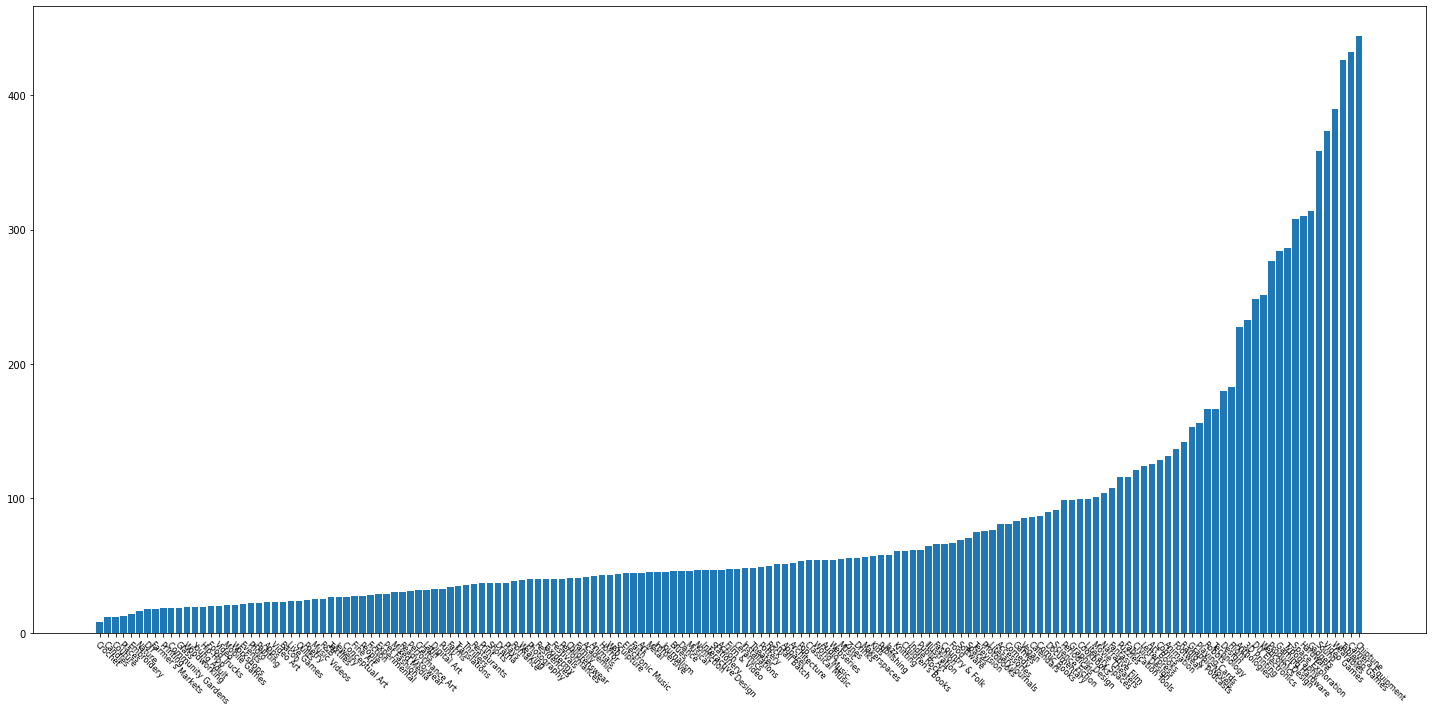

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
x_ticks = np.arange(0, len(sorted_by_backers), 1)
ax.bar(x_ticks, sorted_by_backers.values.flatten())
ax.set_xticks(x_ticks)
ax.set_xticklabels(sorted_by_backers.index.values)

ax.tick_params(axis='x', labelrotation=-45, labelsize=8)
plt.setp(ax.xaxis.get_majorticklabels(), ha="left", rotation_mode="anchor")

plt.tight_layout()
plt.show()

## The Marvel Universe Social Network

### Preperations:

In [ ]:
! pip install kaggle 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 
# download the dataset
! kaggle datasets download csanhueza/the-marvel-universe-social-network
! unzip the-marvel-universe-social-network.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/2.72M [00:00<?, ?B/s]
100% 2.72M/2.72M [00:00<00:00, 90.7MB/s]
Archive:  the-marvel-universe-social-network.zip
  inflating: edges.csv               
  inflating: hero-network.csv        
  inflating: nodes.csv               


In [ ]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

### Solutions:

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer the following questions:

**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [ ]:
hero_network_df = pd.read_csv('hero-network.csv')
hero_network_df.head(5), len(hero_network_df)

(                  hero1                 hero2
 0         LITTLE, ABNER        PRINCESS ZANDA
 1         LITTLE, ABNER  BLACK PANTHER/T'CHAL
 2  BLACK PANTHER/T'CHAL        PRINCESS ZANDA
 3         LITTLE, ABNER        PRINCESS ZANDA
 4         LITTLE, ABNER  BLACK PANTHER/T'CHAL, 574467)

In [ ]:
# following the note : "Note: Not all the links in this dataset are symmetric", i assume that:
# if hero1 appears in each column once (for the total of 2), and hero2 appears once in all columns (total of 1), hero1 is more friendly than hero2, with no exceptions.    
hero1_counts = pd.Series(hero_network_df['hero1'].value_counts()).astype('int32')
hero2_counts = pd.Series(hero_network_df['hero2'].value_counts()).astype('int32')
combined_count = hero1_counts.combine(hero2_counts, lambda x, y: x+y).sort_values(ascending=False)
top_10_most_friendly = combined_count[:10].astype('int32')

print(f'Top 10 most friendly Marvel characters are:')
for name, number_of_friends in zip(top_10_most_friendly.index.values, top_10_most_friendly.values):
  print(f'Name: {name}, number of friends: {number_of_friends}')

Top 10 most friendly Marvel characters are:
Name: CAPTAIN AMERICA, number of friends: 16499
Name: SPIDER-MAN/PETER PAR, number of friends: 13717
Name: IRON MAN/TONY STARK , number of friends: 11817
Name: THOR/DR. DONALD BLAK, number of friends: 11427
Name: THING/BENJAMIN J. GR, number of friends: 10681
Name: WOLVERINE/LOGAN , number of friends: 10353
Name: HUMAN TORCH/JOHNNY S, number of friends: 10237
Name: SCARLET WITCH/WANDA , number of friends: 9911
Name: MR. FANTASTIC/REED R, number of friends: 9775
Name: VISION , number of friends: 9696


,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

In [ ]:
def insert_nodes_and_edges_from_df(df: pd.DataFrame, gx: nx.DiGraph, colors_df: pd.DataFrame):
  color_map = {}
  # adding the hero1 (friendship "initiater") first and calculating its appropriate node color:
  for hero1_name in df['hero1'].values:
    hero_node_color = colors_df[colors_df['node']==hero1_name].values
    if len(hero_node_color) == 0:
      hero_node_color = 'black'
    else:
      hero_node_color = hero_node_color[0][1]

    color_map[hero1_name] = hero_node_color
    gx.add_node(hero1_name)
  
  # adding all hero1 friendship where the friend name is a part of the top 150 heroes:
  for idx, hero1_friendship in df.iterrows():
    hero1_name, hero2_name = hero1_friendship['hero1'], hero1_friendship['hero2']
    if hero2_name in gx.nodes:
      gx.add_edge(hero1_name, hero2_name)
  
  return gx, color_map

colors_df = pd.read_csv('nodes.csv')

nodes_df = pd.read_csv('nodes.csv')
most_friendly_150_names = combined_count[:150].index.values
all_rows_with_hero_1_in_friendliest = hero_network_df[hero_network_df['hero1'].isin(most_friendly_150_names)]

heros_friendship_graph = nx.DiGraph()

# mapping the color green to hero and the color red to comic type of heros, the color black is denoted to heros with any other node type (e.g., none values)
colors_df = pd.read_csv('nodes.csv')
colors_df['type'] = colors_df['type'].apply(lambda node_type: 'red' if node_type=='comic' else 'green' if node_type=='hero' else 'blue')

# insert all friendships from hero1 to hero2
heros_friendship_graph, colormap_of_nodes = insert_nodes_and_edges_from_df(all_rows_with_hero_1_in_friendliest, heros_friendship_graph, colors_df)

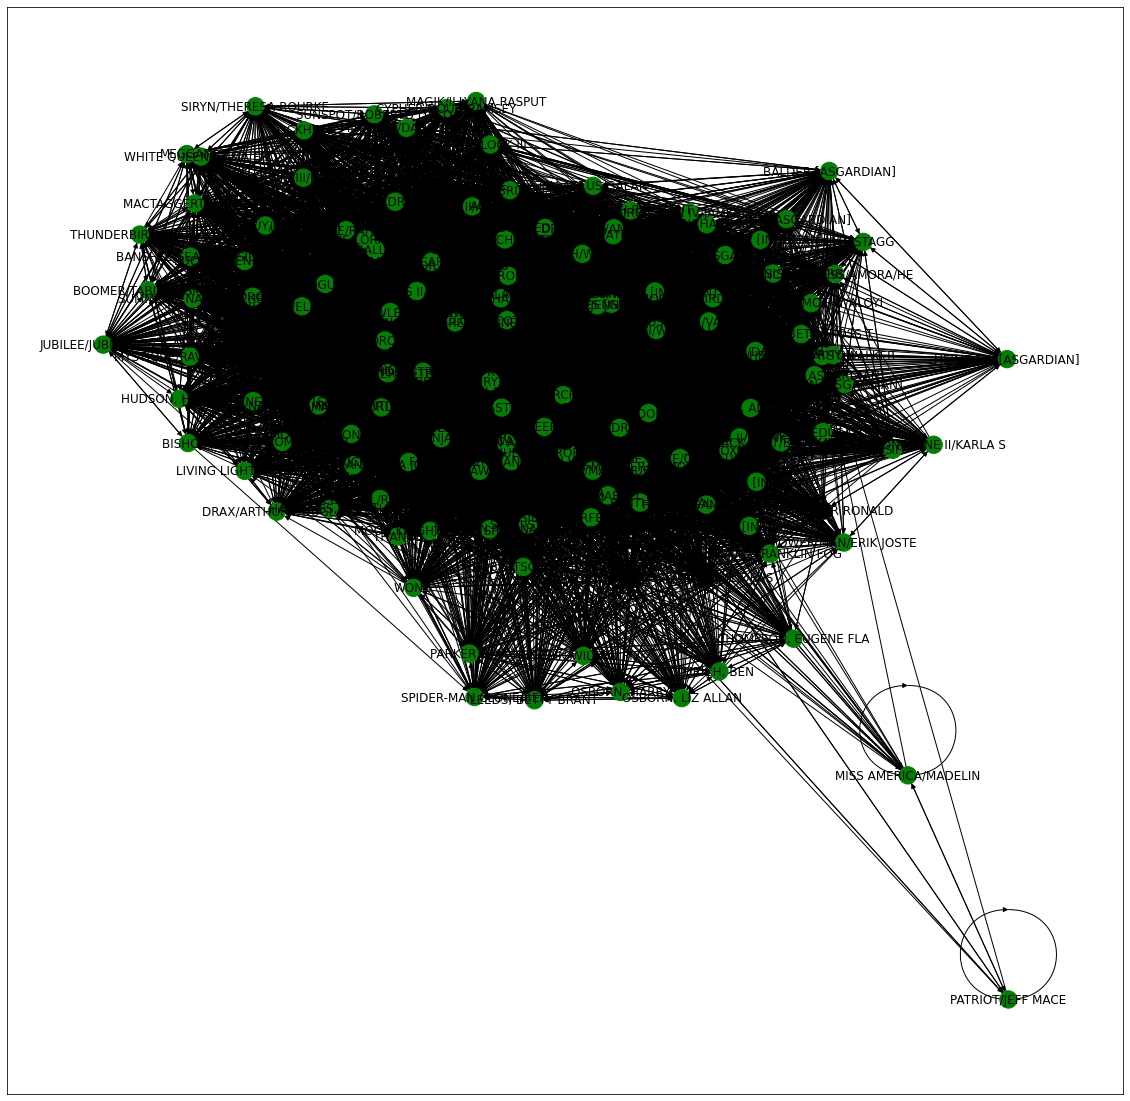

In [ ]:
plt.figure(3,figsize=(20, 20))
graph_colors = list(map(lambda hero_node_name: colormap_of_nodes[hero_node_name], heros_friendship_graph.nodes))
nx.draw_networkx(heros_friendship_graph, pos=nx.spring_layout(heros_friendship_graph), with_labels=True, node_color=graph_colors)

**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) (10pt)